In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import collections

# More libraries for Preparation

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score ,recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold

import warnings

warnings.filterwarnings('ignore')





In [3]:
## Data Insight
# Feature V1-V28 went through PCA process which mean a possible of feature engineering (Except Time and Amount)
# Data was scaled already 
# Transaction is relatively small (88 dollars)


In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Check Null value
df.isnull().sum().max()

0

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# The classes are heavily skewed, which we need to solve this issue.
print('No Frauds ', round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('   Frauds ', round(df['Class'].value_counts()[1]/len(df)*100,2),' % of the dataset')

No Frauds  99.83 % of the dataset
   Frauds  0.17  % of the dataset


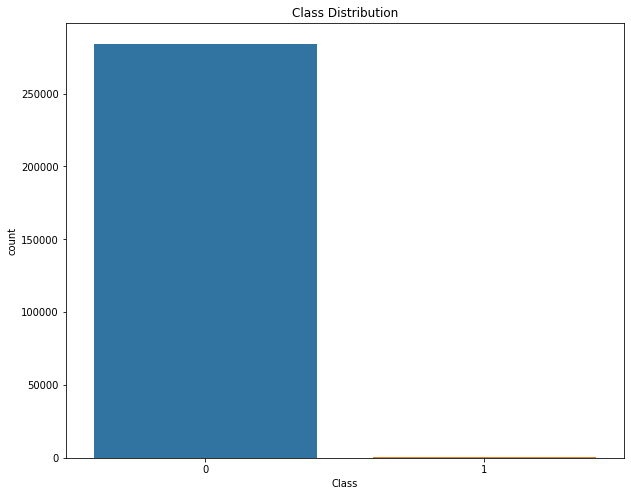

In [10]:
## Distribution of Class Column
plt.figure(figsize = (10,8))
plt.title('Class Distribution')
sns.countplot(df.Class)

The Class Distribution show how skew the class variable is.

In [11]:
# Descriptive Statistic for and Time Amount feature
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


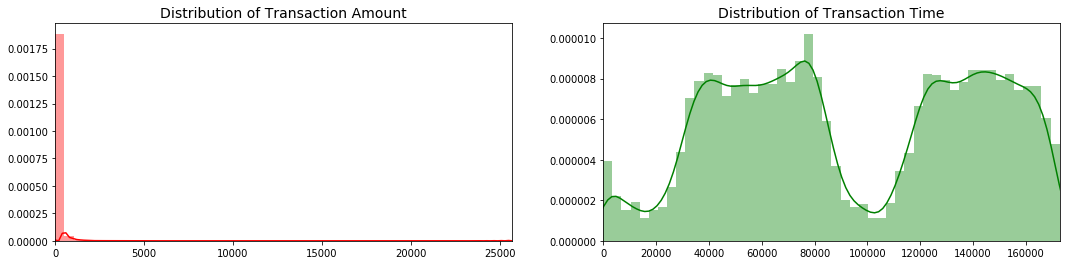

In [12]:
# Visualization of Time and Amount
fig, ax = plt.subplots(1,2 , figsize = (18,4))

amount = df['Amount'].values
time = df['Time'].values

sns.distplot(amount, ax = ax[0] , color = 'r')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount),max(amount)])

sns.distplot(time, ax = ax[1] , color = 'g')
ax[1].set_title('Distribution of Transaction Time', fontsize = 14)
ax[1].set_xlim([min(time),max(time)])

plt.show()

The Class Distribution show how skew the class variable is.

#### Scaling and Distributing

Since variable V1... were scaled by PCA method, Time and Amount will be scaled accordingly.

Also, the class label will be sub sample from the dataframe to have the equivalent of Fraud and Non Fraid cases in order to better see the pattern of fraud and non-fraud that occur in this dataset.

##### Sub-sample

In this dataset, sub sample will be a dataframe with 50/50 ratio of fraud and non-fraud. 
It means that the sub-sample will generate the same amount of fraud and non-fraud dataset. 

##### The reason of subsample in this dataset

    - Overfitting --- Since it highly skewed to Non-Fraud, the model will assume that most transaction are not fraud.
    - Wrong Correlation --- Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

#### Next Step

    - Scale-Time and Scale-Amount are the new columns with scaled values
    - To get the maximum Fraud with 492, we will also take 492 Non-Fraud transaction as well.
    - We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

In [13]:
# 0 is Non-Fraud
# 1 is Fraud
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
# Scale Time and Amount
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Reshape your data using array.reshape(-1, 1) if your data has a single feature
# Use RobScaler becuase it has less outliers problem
df['scaled_amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'],axis = 1, inplace = True)

In [15]:
# Store Value to insert in the df in for particular position
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

In [16]:
# Drop the scaled_ampunt and scaled_time then re-insert with .insert() for particular position.
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [17]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Split Dataset.

For Testing purposes Spliting data for test and training


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2),'% from the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2),'% from the dataset')

X = df.drop('Class', axis = 1)
y =df['Class']

stratified = StratifiedKFold(n_splits = 45, random_state = None, shuffle = False)

for train_index, test_index in stratified.split(X,y):
    print('Train: ', train_index, 'Test: ', test_index)
    original_Xtrain , original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain , original_ytest = y.iloc[train_index], y.iloc[test_index]


# Check Distribution of the labels

# Turn test/train in to array

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique , train_counts = np.unique(original_ytrain, return_counts = True)
test_unique , test_count = np.unique(original_ytest,return_counts= True)

print('-' * 50)

print('Label Distributions : \n')
print(train_counts/len(original_ytrain))
print(test_count/len(original_ytest))



No Frauds 99.83 % from the dataset
Frauds 0.17 % from the dataset
Train:  [  6323   6324   6325 ... 284804 284805 284806] Test:  [   0    1    2 ... 6338 6427 6446]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 6323  6324  6325 ... 12691 12692 12693]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 6899  6903  6971 ... 19039 19040 19041]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 8972  9035  9179 ... 25361 25362 25363]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [10568 10630 10690 ... 31694 31695 31696]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [12070 12108 12261 ... 38013 38014 38015]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [15225 15451 15476 ... 44368 44369 44370]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [16780 16863 17317 ... 50696 50697 50698]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [20198 23308 23422 ... 57021 57022 57

#### Random Under Sample
Removing data in order to have a more balance dataset and thus avoiding our models to overfitting.

    #Step 
    1 - Determine the imbalance data
    2 - Determine number of Fraud Transaction, then scale Non-Fraud to the same amount as Fraud
          50/50 ration   492 Frauds and 492 Non-Frauds
    3 - Shuffle Data to see if the model can maintain a certain accuracy
    
    NOTE : There is a risk of info lost since to scale the data down from 280k to 492. It may not 
            perform as accurate as we think

In [19]:
# Shuffle data before creating subsample
df = df.sample(frac = 1)

# Amount of Fraud classes 492 rows
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] ==0].sample(n=492)

normal_distribute_df = pd.concat([fraud_df,non_fraud_df])

# Shuffle DataFrame Rows

new_df = normal_distribute_df.sample(frac = 1, random_state = 10)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
229712,-0.290924,0.720521,0.908637,2.849024,-5.647343,6.009415,0.216656,-2.397014,-1.819308,0.338527,...,0.241921,0.407260,-0.397435,-0.080006,-0.168597,0.465058,0.210510,0.648705,0.360224,1
42549,0.925452,-0.511578,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,...,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,1
214983,0.656746,0.648480,2.017007,-1.309006,-0.656988,-0.916899,-1.129154,-0.161066,-1.166174,0.150019,...,0.026305,0.388122,0.933235,0.131727,0.762645,-0.238049,-0.144694,-0.018726,-0.043964,0
239499,0.391253,0.768877,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,...,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,1
198868,-0.293440,0.563869,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,...,0.318853,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1


Distribution of Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


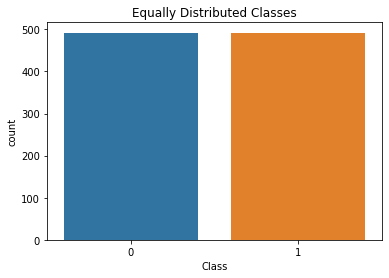

In [20]:
print('Distribution of Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class',data = new_df)
plt.title('Equally Distributed Classes')
plt.show()

#### Correlation Matrices

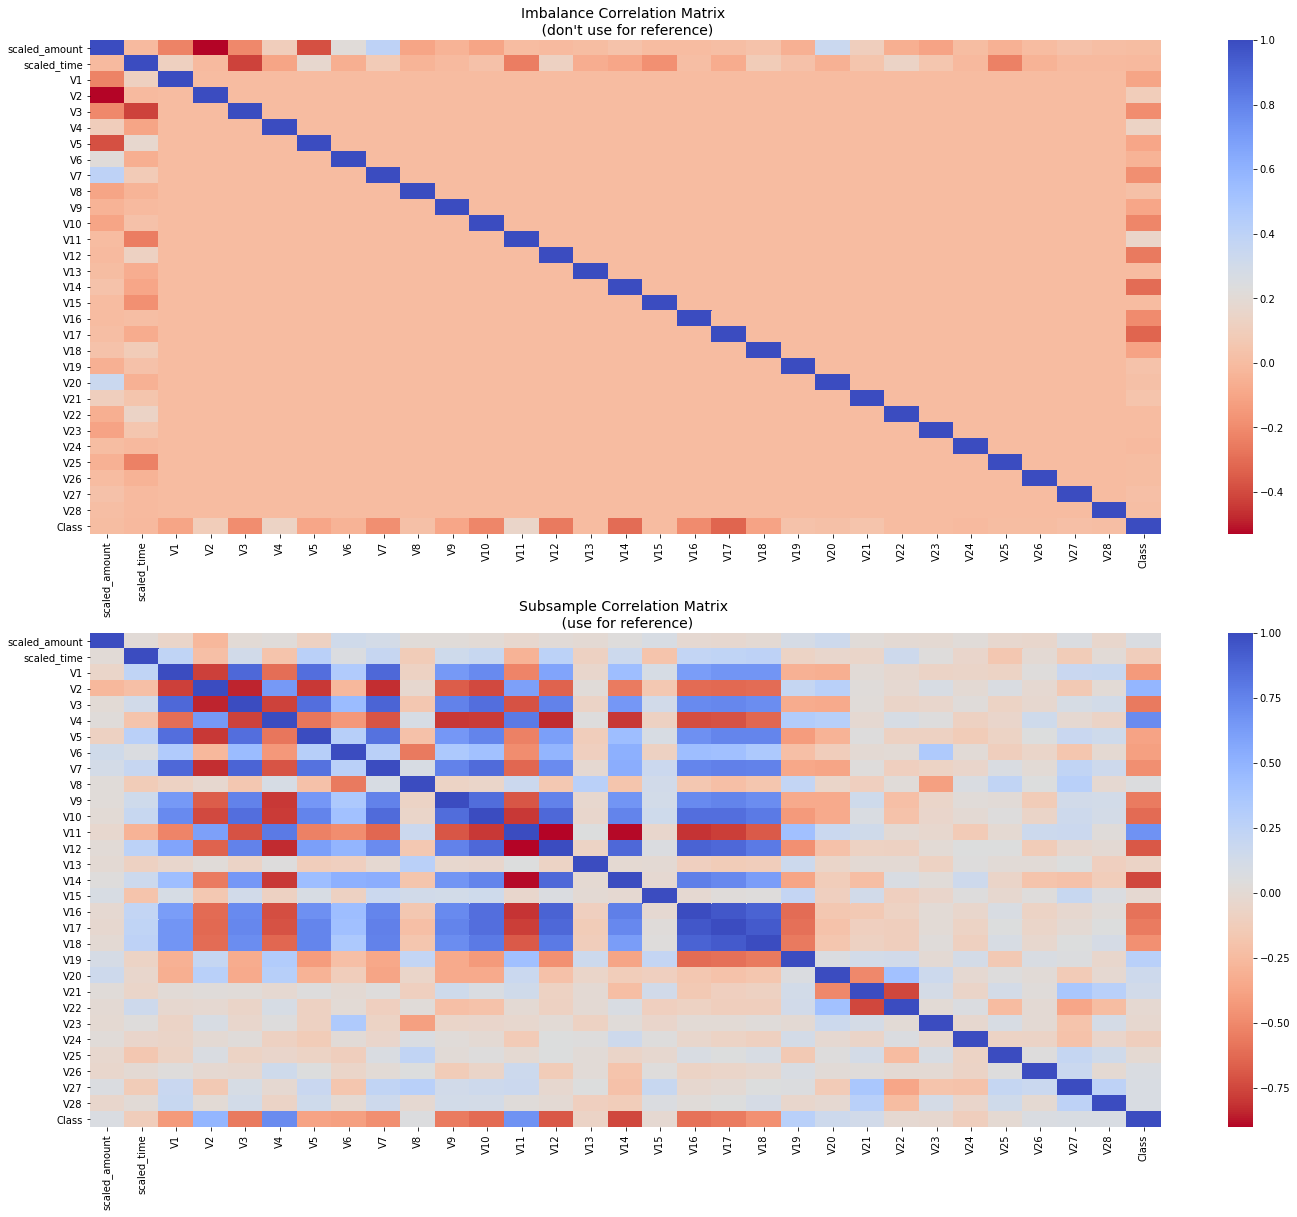

In [21]:
# Correlation
# Using subsample to plot correlation

f,(ax1,ax2) = plt.subplots(2,1,figsize = (24,20))

# Entire dataframe

corr = df.corr()
sns.heatmap(corr,cmap = 'coolwarm_r', annot_kws = {'size':20},ax=ax1)
ax1.set_title("Imbalance Correlation Matrix \n (don't use for reference)",fontsize = 14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws = {'size':20},ax = ax2)
ax2.set_title("Subsample Correlation Matrix \n (use for reference)", fontsize = 14)
plt.show()


#### Correlation Summary
    # Coorelation with Fraud Class
    # Negative Correlation : Close look at V10,V12,V14,V16,V17. 
                            Notice that, the lower these value are, there are higher chance that it will end up being
                            fraud transaction.
    # Positive Correlation : Colse look at V2,V4,V11,V19.
                            Notice that, the higher these value are, there are higher chance that it will end up being
                            fraud transaction.

#### Boxplot

    # The Blockplot will focus on the focusing variable from the correlation both negative and positive.
    
    

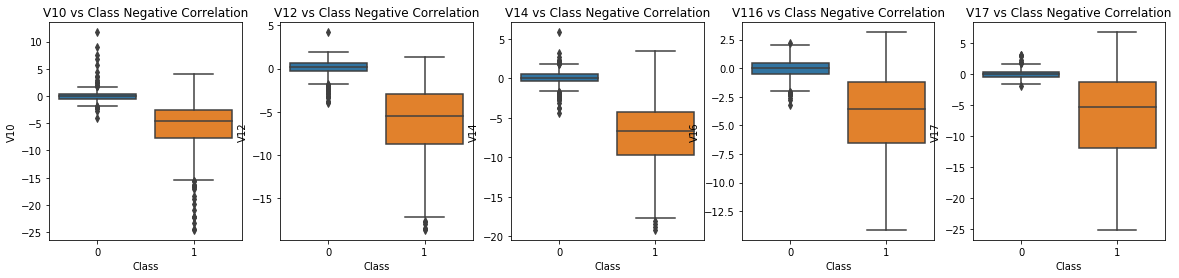

In [22]:
# Negative Correlations with our Class ( The Lower Our feature value the more likely it will be a fraud transaction.)

f,axes = plt.subplots(ncols = 5, figsize = (20,4))

sns.boxplot(x = 'Class', y = 'V10', data = new_df, ax = axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x = 'Class', y = 'V12', data = new_df, ax = axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x = 'Class', y = 'V14', data = new_df, ax = axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x = 'Class', y = 'V16', data = new_df, ax = axes[3])
axes[3].set_title('V116 vs Class Negative Correlation')

sns.boxplot(x = 'Class', y = 'V17', data = new_df, ax = axes[4])
axes[4].set_title('V17 vs Class Negative Correlation')


plt.show()

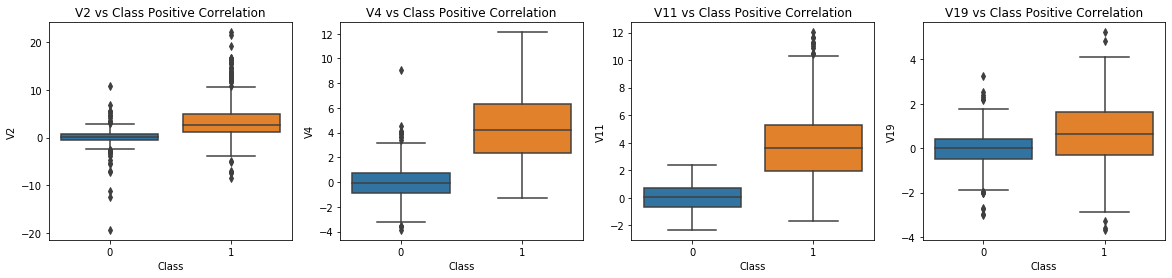

In [23]:
# Positive Correlations with our Class ( The higher Our feature value the more likely it will be a fraud transaction.)

f,axes = plt.subplots(ncols = 4, figsize = (20,4))

sns.boxplot(x = 'Class', y = 'V2', data = new_df, ax = axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x = 'Class', y = 'V4', data = new_df, ax = axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x = 'Class', y = 'V11', data = new_df, ax = axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x = 'Class', y = 'V19', data = new_df, ax = axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')



plt.show()

#### Anomaly Detection
    # Remove extreme outlier from features that have high correlation in our classes.
    # This will have a positive impact on the accuracy of our model


##### Interquartile Range Method
 - Interquartile Range (IQR) : Calculate by the difference between the 75th percentile and 25 percentile. Whichmean that the data point above or below the threshold will be remove
 - Boxplot: Easy way to see the Outliers

##### Outlier Removal Tradeoff
 - Be aware the range of the threshold for removing the outliers.
 - Determine the threshold by multiplying a number by the IQR. The higher this threshold is, less outlier will be removed. And, the lower this threshold is the more outlier will be removed0
 
 

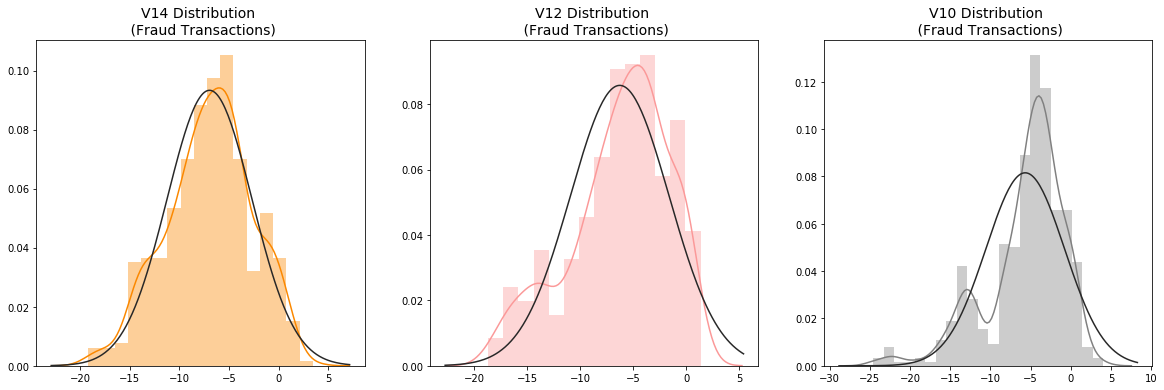

In [24]:
from scipy.stats import norm


f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax = ax1,fit = norm,color = '#FB8800')
ax1.set_title('V14 Distribution \n (Fraud Transactions)',fontsize = 14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax = ax2,fit = norm,color = '#FB9999')
ax2.set_title('V12 Distribution \n (Fraud Transactions)',fontsize = 14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax = ax3,fit = norm,color = 'Grey')
ax3.set_title('V10 Distribution \n (Fraud Transactions)',fontsize = 14)


plt.show()

In [25]:
## V14 Removing Outliers (Highest Negative Correlation with Labels)

v14_fraud = new_df['V14'].loc[new_df['Class'] ==1 ].values
q25 , q75 = np.percentile(v14_fraud, 25) , np.percentile(v14_fraud, 75)

print('Quartile 25 :{} , Quartule 75:{}'.format(q25,q75))
v14_iqr = q75-q25
print('IQR: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower , v14_higher = q25-v14_cut_off, q75+v14_cut_off
print('Cut Off:',v14_cut_off)
print('V14 Lower:',v14_lower)
print('V14 Higher:',v14_higher)

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_higher]

print('Feature V14 Outlier for Fraud Cases:',len(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_higher) | (new_df['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal:', len(new_df))
print('----' * 28)




## V12 Removing Outliers (Highest Negative Correlation with Labels)

v12_fraud = new_df['V12'].loc[new_df['Class'] ==1 ].values
q25 , q75 = np.percentile(v12_fraud, 25) , np.percentile(v12_fraud, 75)

print('Quartile 25 :{} , Quartule 75:{}'.format(q25,q75))
v12_iqr = q75-q25
print('IQR: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower , v12_higher = q25-v12_cut_off, q75+v12_cut_off
print('Cut Off:',v12_cut_off)
print('V12 Lower:',v12_lower)
print('V12 Higher:',v12_higher)

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_higher]

print('Feature V12 Outlier for Fraud Cases:',len(outliers))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_higher) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal:', len(new_df))
print('----' * 28)





## V10 Removing Outliers (Highest Negative Correlation with Labels)

v10_fraud = new_df['V10'].loc[new_df['Class'] ==1 ].values
q25 , q75 = np.percentile(v10_fraud, 25) , np.percentile(v10_fraud, 75)

print('Quartile 25 :{} , Quartule 75:{}'.format(q25,q75))
v10_iqr = q75-q25
print('IQR: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower , v10_higher = q25-v10_cut_off, q75+v10_cut_off
print('Cut Off:',v10_cut_off)
print('V10 Lower:',v10_lower)
print('V10 Higher:',v10_higher)

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_higher]

print('Feature V10 Outlier for Fraud Cases:',len(outliers))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_higher) | (new_df['V10'] < v10_lower)].index)
print('----' * 28)


print('Number of Instances after outliers removal:', len(new_df))

Quartile 25 :-9.692722964972385 , Quartule 75:-4.282820849486866
IQR: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Higher: 3.8320323237414122
Feature V14 Outlier for Fraud Cases: 4
Number of Instances after outliers removal: 979
----------------------------------------------------------------------------------------------------------------
Quartile 25 :-8.67303320439115 , Quartule 75:-2.893030568676315
IQR: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Higher: 5.776973384895937
Feature V12 Outlier for Fraud Cases: 4
Number of Instances after outliers removal: 975
----------------------------------------------------------------------------------------------------------------
Quartile 25 :-7.466658535821848 , Quartule 75:-2.5118611381562523
IQR: 4.954797397665596
Cut Off: 7.4321960964983935
V10 Lower: -14.89885463232024
V10 Higher: 4.920334958342141
Feature V10 Outlier for Fraud Cases: 27
---------------------------------

Text(0, -12, 'Fewer Extreme \n outliers')

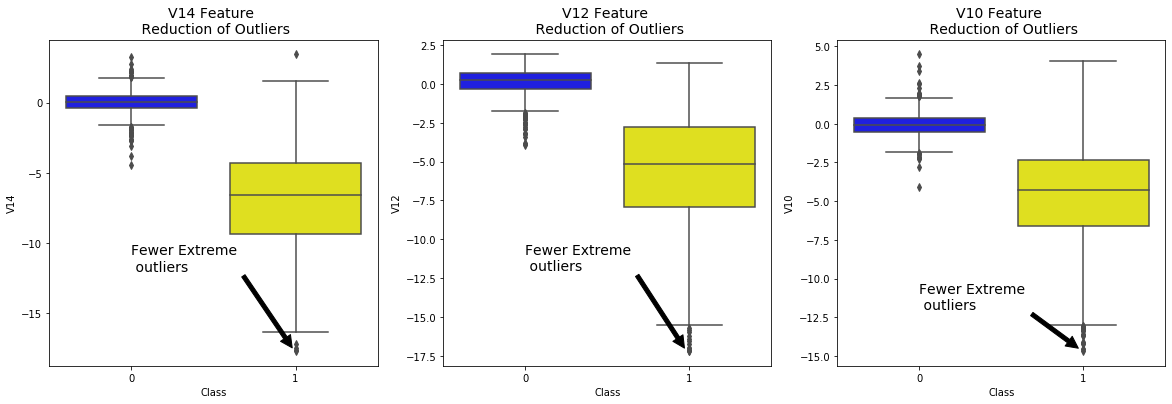

In [26]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,6))

colors = ['Blue','Yellow']

# Boxplot with outlier remove
# Feature V14

sns.boxplot(x = 'Class', y= 'V14', data = new_df,ax=ax1, palette = colors)
ax1.set_title('V14 Feature \n Reduction of Outliers', fontsize =14)
ax1.annotate('Fewer Extreme \n outliers', xy = (0.98,-17.5),xytext = (0,-12),arrowprops = dict(facecolor = 'black'),fontsize = 14)

# Feature V12
sns.boxplot(x = 'Class', y= 'V12', data = new_df,ax=ax2, palette = colors)
ax2.set_title('V12 Feature \n Reduction of Outliers', fontsize =14)
ax2.annotate('Fewer Extreme \n outliers', xy = (0.97,-17),xytext = (0,-12),arrowprops = dict(facecolor = 'black'),fontsize = 14)

# Feature V10

# Feature V12
sns.boxplot(x = 'Class', y= 'V10', data = new_df,ax=ax3, palette = colors)
ax3.set_title('V10 Feature \n Reduction of Outliers', fontsize =14)
ax3.annotate('Fewer Extreme \n outliers', xy = (0.97,-14.5),xytext = (0,-12),arrowprops = dict(facecolor = 'black'),fontsize = 14)




#### Classifier ( Under Sampling)

    # Train 4 types of classifiers and decide which type is the best for detecting fraud transactions.
    # First, Split train, test dataset and separate features from labels.

In [27]:
# Undersampling before cross validationg (Prone to overfit)

X = new_df.drop('Class',axis = 1)
y = new_df['Class']

In [28]:
# Data is alrealy scale 50/50 ratio. 
# Split the scale data to training and test sets.
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
# y is target variable
# X is the rest of the dataset except target variable

# 80% train / 20 % test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1 )

In [29]:
# Turn variable from dataframe type to array type. for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [30]:
# Implement Simple classifiers

classifiers = {'LogisticRegression': LogisticRegression(),
              'KNearest': KNeighborsClassifier(),
              'Support Vector Classifier':SVC(),
              'DecisionTreeClassifier':DecisionTreeClassifier(),
              'Random Forest Classifier':RandomForestClassifier(),
              'Gradient Boosting Classifier':GradientBoostingClassifier(),
              'Ada Boosting Classifier': AdaBoostClassifier()}

In [31]:
# Apply Cross Validation
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier, X_train,y_train, cv = 10)
    print('Classifiers:',classifier.__class__.__name__,'Has a Training Score of:', round(training_score.mean(),2)*100,'% accuracy score')

Classifiers: LogisticRegression Has a Training Score of: 94.0 % accuracy score
Classifiers: KNeighborsClassifier Has a Training Score of: 93.0 % accuracy score
Classifiers: SVC Has a Training Score of: 93.0 % accuracy score
Classifiers: DecisionTreeClassifier Has a Training Score of: 89.0 % accuracy score
Classifiers: RandomForestClassifier Has a Training Score of: 93.0 % accuracy score
Classifiers: GradientBoostingClassifier Has a Training Score of: 94.0 % accuracy score
Classifiers: AdaBoostClassifier Has a Training Score of: 93.0 % accuracy score


In [32]:
# Apply GridSerchCV to find best Parameters

from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}

grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,y_train)
#print(grid_log_reg)

# We automatically get the logistic regression with the best parameters
log_reg = grid_log_reg.best_estimator_


# K-Nearest-Neighborhood
knears_params = {'n_neighbors' : list(range(2,5,1)),'algorithm':['auto','ball_tree','kd_tree','brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knears.fit(X_train,y_train)

#KNN Best parametor
Knears_neighbors = grid_knears.best_estimator_

# SVC Classifier

svc_params = {'C':[0.5,0.7,0.9,1], 'kernel':['rbf','poly','sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(),svc_params)
grid_svc.fit(X_train,y_train)
 
# SVC best parameter
svc = grid_svc.best_estimator_

# Decision Tree Classifier
tree_params = {'criterion' : ['gini','entropy'],'max_depth':list(range(2,4,1)),'min_samples_leaf':list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(),tree_params)
grid_tree.fit(X_train,y_train)

# Tree Best Estimator
tree_clf = grid_tree.best_estimator_


In [33]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg,X_train,y_train, cv =10)
print('Logistic Regression Cross Validation Score:', round(log_reg_score.mean() * 100,2).astype(str) + '%')

knears_score = cross_val_score(Knears_neighbors,X_train,y_train, cv =10)
print('K Nearest Neighborhood Cross Validation Score:', round(knears_score.mean() * 100,2).astype(str) + '%')

svc_score = cross_val_score(svc,X_train,y_train, cv =10)
print('Support Vector Classifier Cross Validation Score:', round(svc_score.mean() * 100,2).astype(str) + '%')

tree_score = cross_val_score(tree_clf,X_train,y_train, cv =10)
print('Decision Tree Classifier Cross Validation Score:', round(tree_score.mean() * 100,2).astype(str) + '%')

Logistic Regression Cross Validation Score: 93.9%
K Nearest Neighborhood Cross Validation Score: 93.11%
Support Vector Classifier Cross Validation Score: 93.37%
Decision Tree Classifier Cross Validation Score: 91.25%


#### Summary :
    # Logistic Regression classifier
    # Grid Search CV
    # Logistic Regression has the best ROC (Receiving Operating Characteristic score), meaning that 
        it accurately separated fraud and non-fraud transaction.
        

In [34]:
# Undersample during cross validating
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Take take variable out and assign to another variable (separated it out)
undersample_X = df.drop('Class', axis = 1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print('Train:', train_index,'Test:', test_index)
    undersample_Xtrain , undersample_Xtest = undersample_X.iloc[train_index],undersample_X.iloc[test_index]
    undersample_ytrain , undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision =[]
undersample_recall = []
undersample_f1 = []
undersample_auc = []


# NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)

for train, test in sss.split(undersample_Xtrain,undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy = 'majority'),log_reg) # SMOTE Happend during Cross Validation not before
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test],original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test],undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test],undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test],undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test],undersample_prediction))



Train: [ 51429  52504  53088 ... 284804 284805 284806] Test: [    0     1     2 ... 56970 56971 56972]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 51429  52504  53088 ... 115558 115702 117309]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113920 113921 113922 ... 170882 170883 171408]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170884 170885 170886 ... 230315 230613 231134]
Train: [     0      1      2 ... 230315 230613 231134] Test: [227839 227840 227841 ... 284804 284805 284806]


In [35]:
# Plot losgistic Regression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1,estimator2,estimator3,estimator4, X, y, ylim = None, cv = None,n_jobs = 1, train_sizes=np.linspace(.1, 1.0, 5)):
    f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (20,14),sharey = True)
    if ylim != None:
        plt.ylim(*ylim)
        
    # First Estimator
    train_sizes,train_scores,test_scores = learning_curve(estimator1,X,y,cv=cv, n_jobs = n_jobs,train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores,axis = 1)
    train_scores_std = np.std(train_scores,axis =1)
    test_scores_mean = np.mean(test_scores,axis = 1)
    test_scores_std = np.std(test_scores,axis = 1)
    
    ax1.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha = 0.1,color = '#ff9124')
    ax1.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha = 0.1,color = '#2492ff')
    ax1.plot(train_sizes,train_scores_mean,'o-',color = '#ff9124',label = 'Training Score')
    ax1.plot(train_sizes , test_scores_mean,'o-',color = '#2492ff',label = 'Cross-Validation Score')
    ax1.set_title('Logistic Regression Learning Curve', fontsize = 14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc = 'best')
    
    # Second Estimator
    train_sizes,train_scores,test_scores = learning_curve(estimator1,X,y,cv=cv, n_jobs = n_jobs,train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores,axis = 1)
    train_scores_std = np.std(train_scores,axis =1)
    test_scores_mean = np.mean(test_scores,axis = 1)
    test_scores_std = np.std(test_scores,axis = 1)
    
    ax2.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha = 0.1,color = '#ff9124')
    ax2.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha = 0.1,color = '#2492ff')
    ax2.plot(train_sizes,train_scores_mean,'o-',color = '#ff9124',label = 'Training Score')
    ax2.plot(train_sizes , test_scores_mean,'o-',color = '#2492ff',label = 'Cross-Validation Score')
    ax2.set_title('K-Nearest Neighborhood \n Learning Curve', fontsize = 14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc = 'best')
    
    # Thrid Estimator
    train_sizes,train_scores,test_scores = learning_curve(estimator1,X,y,cv=cv, n_jobs = n_jobs,train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores,axis = 1)
    train_scores_std = np.std(train_scores,axis =1)
    test_scores_mean = np.mean(test_scores,axis = 1)
    test_scores_std = np.std(test_scores,axis = 1)
    
    ax3.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha = 0.1,color = '#ff9124')
    ax3.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha = 0.1,color = '#2492ff')
    ax3.plot(train_sizes,train_scores_mean,'o-',color = '#ff9124',label = 'Training Score')
    ax3.plot(train_sizes , test_scores_mean,'o-',color = '#2492ff',label = 'Cross-Validation Score')
    ax3.set_title('Support Vector Machine Classier \n Learning Curve', fontsize = 14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc = 'best')
    
    # Forth Estimator
    train_sizes,train_scores,test_scores = learning_curve(estimator1,X,y,cv=cv, n_jobs = n_jobs,train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores,axis = 1)
    train_scores_std = np.std(train_scores,axis =1)
    test_scores_mean = np.mean(test_scores,axis = 1)
    test_scores_std = np.std(test_scores,axis = 1)
    
    ax4.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha = 0.1,color = '#ff9124')
    ax4.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha = 0.1,color = '#2492ff')
    ax4.plot(train_sizes,train_scores_mean,'o-',color = '#ff9124',label = 'Training Score')
    ax4.plot(train_sizes , test_scores_mean,'o-',color = '#2492ff',label = 'Cross-Validation Score')
    ax4.set_title('Decision Tree Classifier \n Learning Curve', fontsize = 14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc = 'best')
    
    return plt
    
    

<module 'matplotlib.pyplot' from '/Users/pariponthanthong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

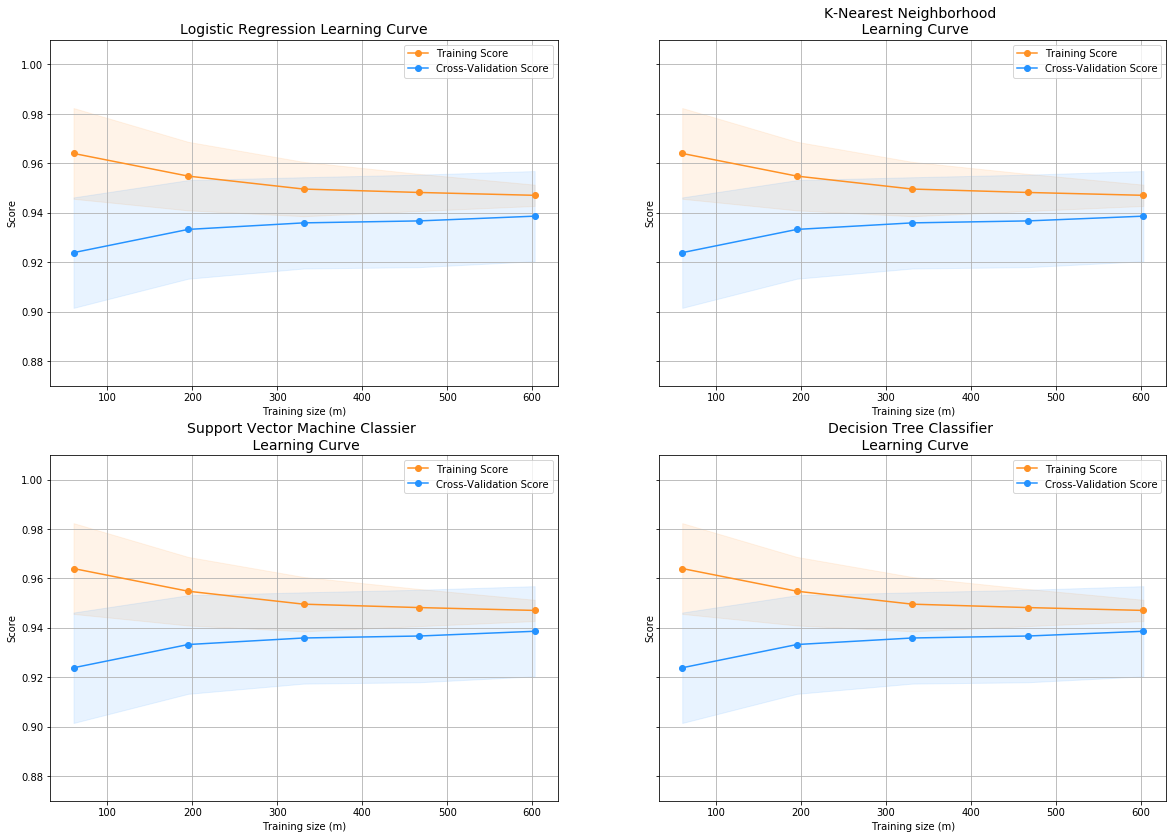

In [36]:
cv = ShuffleSplit(n_splits = 100,test_size = 0.2,random_state = 10)
plot_learning_curve(log_reg, Knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [37]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create dataframe with all the scores and the classfiers names

log_reg_pred = cross_val_predict(log_reg,X_train, y_train,cv = 10, method = 'decision_function')
knears_pred = cross_val_predict(Knears_neighbors,X_train,y_train, cv = 10)
svc_pred = cross_val_predict(svc,X_train, y_train, cv = 10,method = 'decision_function')
tree_pred = cross_val_predict(tree_clf,X_train,y_train, cv =10)


In [38]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train,log_reg_pred))
print('K-Nearest Neighborhood: ',roc_auc_score(y_train,knears_pred))
print('Support Vector Machine: ',roc_auc_score(y_train,svc_pred))
print('Decision Tree Classifier: ',roc_auc_score(y_train,tree_pred))

Logistic Regression:  0.9794446321004335
K-Nearest Neighborhood:  0.9302482688735011
Support Vector Machine:  0.9785861059505715
Decision Tree Classifier:  0.9120292180374936


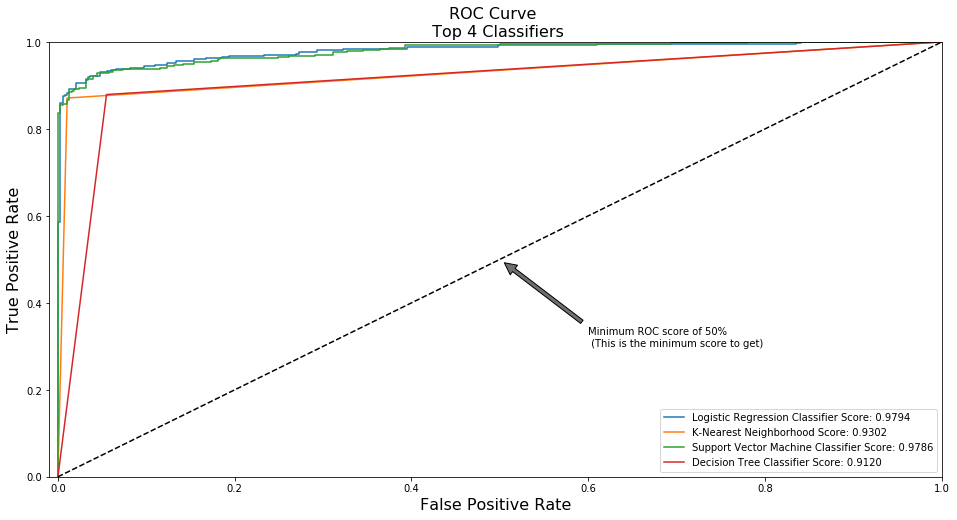

In [39]:
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr , knear_threshold = roc_curve(y_train,knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr,log_tpr,knear_fpr,knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize = (16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize = 16)
    plt.plot(log_fpr, log_tpr, label = 'Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train,log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label = 'K-Nearest Neighborhood Score: {:.4f}'.format(roc_auc_score(y_train,knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label = 'Support Vector Machine Classifier Score: {:.4f}'.format(roc_auc_score(y_train,svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label = 'Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train,tree_pred)))
    
    plt.plot([0,1],[0,1],'k--')
    plt.axis([-0.01,1,0,1])
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.annotate('Minimum ROC score of 50% \n (This is the minimum score to get)',xy= (0.5,0.5),xytext = (0.6,0.3),
arrowprops = dict(facecolor = '#6E726D',shrink = 0.05))
    plt.legend()
graph_roc_curve_multiple(log_fpr,log_tpr,knear_fpr,knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()


#### Deep dive into Logistic Regression

    # Term
    - True Positives : Correctly Classified Fraud Transactions
    - False Positives : Incorrectly Classified Fraud Transactions
    - True Negatives : Correctly Classified Non-Fraud Transactions
    - False Positive : Incorrectly Classified Non-Fraud Transactions
    
    - Precision : True Positive / (True Positive + False Positives)
    - Recall : True Positives/(True Positive + False Negatives)
    
    # Precision / Recall Tradeoff: 

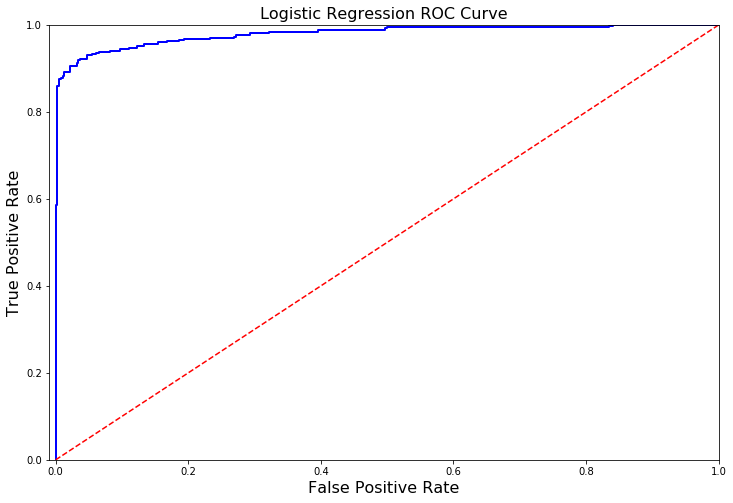

In [40]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [41]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)


In [46]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train,y_pred)))
print('Precision Score{:.2f}'.format(precision_score(y_train,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train,y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train,y_pred)))

# How the score should look like

print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))


Overfitting: 

Recall Score: 0.94
Precision Score0.73
F1 Score: 0.82
Accuracy Score: 0.80
How it should be:

Accuracy Score: 0.78
Precision Score: 0.00
Recall Score: 0.20
F1 Score: 0.00


In [47]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [48]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average Precision-Recall score : {0:0.2f}'.format(undersample_average_precision))

Average Precision-Recall score : 0.05


Text(0.5, 1.0, 'Under Sampling Precision-Recall Curve : \n Average Precision-Recall Score = 0.05')

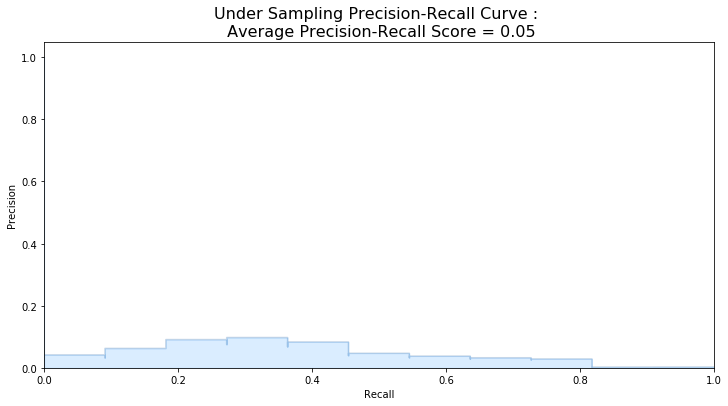

In [51]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))


precision, recall, _ = precision_recall_curve(original_ytest,undersample_y_score)
plt.step(recall,precision,color = '#004a93', alpha = 0.2, where = 'post')
plt.fill_between(recall,precision,step = 'post', alpha = 0.2, color = '#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])

plt.title('Under Sampling Precision-Recall Curve : \n Average Precision-Recall Score = {0:0.2f}'.format(undersample_average_precision),fontsize =16)





SMOTE Technique (Over - Sampling)

Synthetic Minority Over-Sampling Technique. 